# Section 1 : NER Processing using NLTK Library

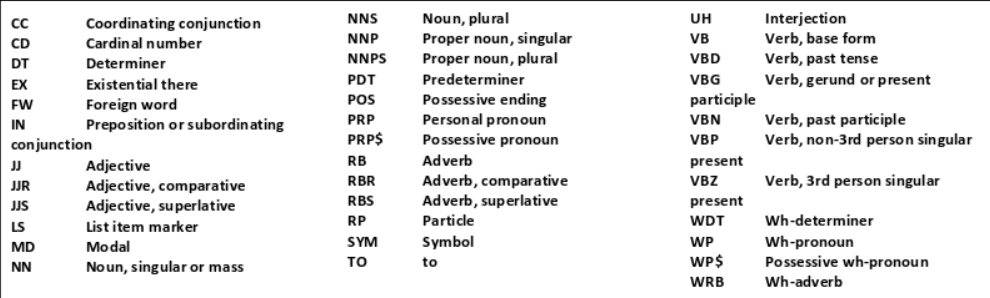

In [44]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

# Library for Tree like Printing
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint

In [51]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [15]:
def fn_ProcessSentence(sent):
    sentence = nltk.word_tokenize(sent)
    sentence_tagged = nltk.pos_tag(sentence)
    return sentence_tagged

In [32]:
#sample = "European authorities fined Google related to a case in Mobile Phone Market"
sample = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'

In [33]:
ls_pos = fn_ProcessSentence(sample) # Example NNP - Proper Noun
ls_pos

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

In [36]:
# Look for a Pattern if we are interested in
# Example : Form a Norm Pharse when RE finds an optional determiner DT and is followed set of adjectives (JJ) and then a noun (NN).

text_pattern = 'NP: {<DT>?<JJ>*<NN>}'

In [40]:
cp = nltk.RegexpParser(text_pattern)
cs_pos = cp.parse(ls_pos)
print(cs_pos)

(S
  European/JJ
  authorities/NNS
  fined/VBD
  Google/NNP
  (NP a/DT record/NN)
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  (NP power/NN)
  in/IN
  (NP the/DT mobile/JJ phone/NN)
  (NP market/NN)
  and/CC
  ordered/VBD
  (NP the/DT company/NN)
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


In [ ]:
# from nltk.chunk import ne_chunk
ne_tree = nltk.chunk.ne_chunk(pos_tag(word_tokenize(text_pattern)))
print(ne_tree)

In [86]:
def fn_listOfNouns(sentences):
       # Return just Proper Nouns Personal Pronouns
       for sent in sentences:
            chunks = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent)), binary=False)
            pos_stack = []
            # print(sent)
            items = tree2conlltags(chunks)
            for item in items:
                if item[1] == 'NNP' and (item[2] == 'B-PERSON' or item[2] == 'O'):
                    pos_stack.append((item[0]))
                elif item[1] == 'PRP':        # Personal Pronouns
                    pos_stack.append(item[0])
            print("\t {}".format(pos_stack))

In [95]:
 sentences = [
            "John  and Mary are married. They have two kids",
            "John met Mary in Pizzeria. She asked him to order a Pizza"
        ]
fn_listOfNouns(sentences)

	 ['John', 'Mary', 'They']
	 ['John', 'Mary', 'She', 'him']


# Section 2 : Using Spacy as a Library

*   SpaCy’s NER has been trained on the OntoNotes 5 corpus and it supports the several entity types
*   Apply nlp once and the entire background pipeline will return the objects.



In [96]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [99]:
sentence = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
pprint([(X.text, X.label_) for X in sentence.ents])

# NORD (nationalities or religious or political groups)
# ORG is Organization
# Money, Date etc.

[('European', 'NORP'),
 ('Google', 'ORG'),
 ('$5.1 billion', 'MONEY'),
 ('Wednesday', 'DATE')]


## Print other details

In [101]:
pprint([(X, X.ent_iob_, X.ent_type_) for X in sentence])

# B - Begining of Sentence, O - Non-entity Token, I- Inner Token etc.

[(European, 'B', 'NORP'),
 (authorities, 'O', ''),
 (fined, 'O', ''),
 (Google, 'B', 'ORG'),
 (a, 'O', ''),
 (record, 'O', ''),
 ($, 'B', 'MONEY'),
 (5.1, 'I', 'MONEY'),
 (billion, 'I', 'MONEY'),
 (on, 'O', ''),
 (Wednesday, 'B', 'DATE'),
 (for, 'O', ''),
 (abusing, 'O', ''),
 (its, 'O', ''),
 (power, 'O', ''),
 (in, 'O', ''),
 (the, 'O', ''),
 (mobile, 'O', ''),
 (phone, 'O', ''),
 (market, 'O', ''),
 (and, 'O', ''),
 (ordered, 'O', ''),
 (the, 'O', ''),
 (company, 'O', ''),
 (to, 'O', ''),
 (alter, 'O', ''),
 (its, 'O', ''),
 (practices, 'O', '')]


## Section 3: Processing an Article from Web and extracting Entity Details

In [105]:
from bs4 import BeautifulSoup
import requests
import re

In [104]:
def fn_url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))


In [118]:
# ny_bb = fn_url_to_string('https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news')
# url = "https://www.nytimes.com/2023/12/15/us/politics/rudy-giuliani-defamation-trial-damages.html"
url = "https://www.deccanherald.com/business/economy/not-2025-india-will-take-another-3-4-years-to-touch-5-tn-gdp-rajan-2813471"

doc_processed = fn_url_to_string(url)

article = nlp(doc_processed)
print("There are {}".format(len(article.ents)) + " Entities in the Article")

labels = [x.label_ for x in article.ents]

print("Here are few unique labels")
Counter(labels)


There are 102 Entities in the Article
Here are few unique labels


Counter({'DATE': 19,
         'GPE': 22,
         'MONEY': 7,
         'PERSON': 14,
         'CARDINAL': 10,
         'ORDINAL': 3,
         'NORP': 7,
         'ORG': 18,
         'WORK_OF_ART': 1,
         'FAC': 1})

In [119]:
print("Following are the top 5 Tokens")

items = [x.text for x in article.ents]
Counter(items).most_common(5)

Following are the top 5 Tokens


[('India', 12), ('$5 trillion', 5), ('2025', 4), ('Rajan', 3), ('Indian', 3)]

## Analyse one sentence in detail

In [134]:
SENTENCE_NUMBER = 3
sentences = [x for x in article.sents]
print(sentences[SENTENCE_NUMBER])

When asked about India’s $5 trillion economy goals, former RBI Governor Dr Raghuram Rajan, dismissed the timeline of 2025 brandished by the Indian government, to say “It is 3-4 years, probably 4 years (away).” 


In [135]:
displacy.render(nlp(str(sentences[SENTENCE_NUMBER])), jupyter=True, style='ent')

In [137]:
# Display Dependencies within Sentence to understand. This could be used to see if there wrong (or right) classifications and why

displacy.render(nlp(str(sentences[SENTENCE_NUMBER])), style='dep', jupyter = True, options = {'distance': 120})

In [138]:
# We can lemmatize the entire sentence
[(x.orth_,x.pos_, x.lemma_) for x in [y  for y in nlp(str(sentences[SENTENCE_NUMBER])) if not y.is_stop and y.pos_ != 'PUNCT']]

[('asked', 'VERB', 'ask'),
 ('India', 'PROPN', 'India'),
 ('$', 'SYM', '$'),
 ('5', 'NUM', '5'),
 ('trillion', 'NUM', 'trillion'),
 ('economy', 'NOUN', 'economy'),
 ('goals', 'NOUN', 'goal'),
 ('RBI', 'PROPN', 'RBI'),
 ('Governor', 'PROPN', 'Governor'),
 ('Dr', 'PROPN', 'Dr'),
 ('Raghuram', 'PROPN', 'Raghuram'),
 ('Rajan', 'PROPN', 'Rajan'),
 ('dismissed', 'VERB', 'dismiss'),
 ('timeline', 'NOUN', 'timeline'),
 ('2025', 'NUM', '2025'),
 ('brandished', 'VERB', 'brandish'),
 ('Indian', 'ADJ', 'indian'),
 ('government', 'NOUN', 'government'),
 ('3', 'NUM', '3'),
 ('-', 'SYM', '-'),
 ('4', 'NUM', '4'),
 ('years', 'NOUN', 'year'),
 ('probably', 'ADV', 'probably'),
 ('4', 'NUM', '4'),
 ('years', 'NOUN', 'year'),
 ('away', 'ADV', 'away'),
 ('\xa0', 'SPACE', '\xa0')]

In [139]:
dict([(str(x), x.label_) for x in nlp(str(sentences[SENTENCE_NUMBER])).ents])

{'India': 'GPE',
 '$5 trillion': 'MONEY',
 'RBI': 'ORG',
 'Raghuram Rajan': 'PERSON',
 '2025': 'DATE',
 'Indian': 'NORP',
 '3-4 years': 'DATE',
 '4 years': 'DATE'}

In [141]:
# Finally here is a Visualisation of the entire article

displacy.render(nlp(str(sentences)), jupyter=True, style='ent')